## EDA - Exploratory Data Analysis

Etapa en la que se llevara a cabo un análisis exhaustivo de los datos. Entre los aspectos destacados que se deben abordar en esta etapa se encuentran:

- La busqueda de valores faltantes.
- Tratamiento de valores faltantes.
- Valores atipicos/extremos o outliers.
- Registros duplicados.

#### Importación de librerias:

In [19]:
import pandas as pd
from io import BytesIO
import pyarrow.parquet as pq
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import Utilidades as ut

### Business 📊

*Dataset que contiene información del comercio, incluyendo localización, atributos y categorías.*

*Definimos la ruta del archivo :*

In [20]:
ruta = './Datos/Yelp/business.pkl' 

*Almacenamos el contenido del archivo en un DataFrame:*

In [21]:
with open(ruta, "rb") as file:
    df_business = pd.read_pickle(BytesIO(file.read()))

*Visualizamos el DataFrame:*

In [22]:
df_business.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*Visualizamos la información general del DataFrame (nombres de las columnas, valores **non-null** y tipo de dato por columna):*

In [23]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150346 entries, 0 to 150345
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
 14  business_id   5 non-null       object
 15  name          5 non-null       object
 16  address       5 non-null       object
 17  city          5 non-null       object
 18  state         5 non-null     

> *Podemos ver que las columnas del DataFrame estan duplicadas, y esas columnas duplicadas poseen un número muy bajo de valores **non-null**.*

*Procedemos a eliminar esas columnas, ya que no aportan nada relevante:*

In [24]:
df_business = df_business.loc[:, ~df_business.columns.duplicated()]

*Analizamos el porcentaje de valores nulos:*

In [25]:
ut.porcentaje_valores_nulos(df_business)

La columna business_id tiene un  0.00 % de valores nulos
La columna name tiene un  0.00 % de valores nulos
La columna address tiene un  0.00 % de valores nulos
La columna city tiene un  0.00 % de valores nulos
La columna state tiene un  0.00 % de valores nulos
La columna postal_code tiene un  0.00 % de valores nulos
La columna latitude tiene un  0.00 % de valores nulos
La columna longitude tiene un  0.00 % de valores nulos
La columna stars tiene un  0.00 % de valores nulos
La columna review_count tiene un  0.00 % de valores nulos
La columna is_open tiene un  0.00 % de valores nulos
La columna attributes tiene un  9.14 % de valores nulos
La columna categories tiene un  0.07 % de valores nulos
La columna hours tiene un  15.45 % de valores nulos


> *Podemos observar que la gran mayoria de las columnas no poseen valores nulos, y las que si poseen, representan un porcentaje muy bajo.*

*Antes de seguir con el análisis estadistico del DataFrame, guardaremos el archivo en formato **.parquet**, para que al ejecutar operaciones sobre el, sea de manera más optimizada:*

In [26]:
df_business.to_parquet('./Datos/Yelp/business.parquet')

*Abrimos el archivo, pero en formato **.parquet**:*

In [27]:
df_business = pq.read_table('./Datos/Yelp/business.parquet').to_pandas()

*Analizamos las estadisticas descriptivas de las variables numéricas del DataFrame, y veremos que información relevante podemos obtener a partir de allí:*

In [28]:
df_business.describe()

,latitude,longitude,stars,review_count,is_open
count,150346.000000,150346.000000,150346.000000,150346.000000,150346.00000
mean,36.671150,-89.357339,3.596724,44.866561,0.79615
std,5.872759,14.918502,0.974421,121.120136,0.40286
min,27.555127,-120.095137,1.000000,5.000000,0.00000
25%,32.187293,-90.357810,3.000000,8.000000,1.00000
50%,38.777413,-86.121179,3.500000,15.000000,1.00000
75%,39.954036,-75.421542,4.500000,37.000000,1.00000
max,53.679197,-73.200457,5.000000,7568.000000,1.00000


> *Podemos concluir que la mayoría de los comercios tienen una calificación promedio de aproximadamente 3.60, la cantidad promedio de reseñas por comercio es de aproximadamente 44.87 y la gran mayoría de los negocios (aproximadamente el 75%) están abiertos, lo que indica una actividad comercial activa.*

*Analizamos los registros duplicados según **business_id**, ya que deberia haber un unico ID por comercio:*

In [29]:
df_business[df_business.duplicated(subset= ['business_id'])]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours


> *Podemos ver que los comercios estan registrados correctamente, ya que no poseen IDs duplicados.*

*Comercios con mayor cantidad de sucursales:*

In [30]:
df_business['name'].value_counts().head()

name
Starbucks     724
McDonald's    703
Dunkin'       510
Subway        459
Taco Bell     365
Name: count, dtype: int64

> *Estos cinco comercios representan una proporción significativa del total de negocios. Esto sugiere que hay una concentración de ciertos tipos de comercios en el mercado, lo que puede deberse a la popularidad o demanda de estos servicios entre los consumidores. Podemos ver que el comercio con mayor cantidad de sucursales es Starbucks, con un total de 724 sucursales. Y en segundo lugar, se encuentra posicionado el comercio de nuestro interes, McDonald's, con 703 sucursales.*

*Ciudades con mayor cantidad de comercios:*

In [31]:
df_business['city'].value_counts().head()

city
Philadelphia    14569
Tucson           9250
Tampa            9050
Indianapolis     7540
Nashville        6971
Name: count, dtype: int64

> *El análisis revela que Philadelphia es la ciudad con mayor cantidad de comercios, superando notablemente a otras ciudades en cantidad. En segundo y tercer lugar se encuentran Tucson y Tampa, respectivamente, con una diferencia de aproximadamente 200 locales entre ellas.* 

*Top 5 estados con mayor cantidad de comercios:*

In [32]:
df_business['state'].value_counts().head()

state
PA    34039
FL    26329
TN    12056
IN    11246
MO    10913
Name: count, dtype: int64

> *Superando la cantidad de comercios en otros estados de manera significativa, se encuentran en primer y segundo lugar, Pensilvania y Florida. Esto sugiere que estos estados tienen una mayor densidad comercial en comparación con otros estados. Esto puede ser util para identificar oportunidades de mercado en regiones especificas.*

*Distribución de comercios según categorias:*

*Analizamos la distribución de los comercios según la categoria:*

In [33]:
df_business['categories'].value_counts().head()

categories
Beauty & Spas, Nail Salons    1012
Restaurants, Pizza             935
Nail Salons, Beauty & Spas     934
Pizza, Restaurants             823
Restaurants, Mexican           728
Name: count, dtype: int64

> *Analizando a simple vista, podemos observar que en primer lugar, se posiciona la categoria **Beauty & Spas, Nail Salons** con mayor cantidad de comercios de este tipo, y en segundo lugar la categoria **Restaurants, Pizza**. Si analizaramos detalladamente todas las categorias, podriamos ver que los comercios, estan categorizados de distintas formas. Asique deberiamos evaluar cual es el ranking correcto agrupando las categorias según sus palabras claves.*

*Generamos un DataFrame auxiliar, donde agrupamos los comercios por las categorias más populares:*

In [34]:
df_agrupado = pd.DataFrame(df_business['categories'].apply(ut.agrupar_categorias).value_counts())

*Graficamos:*

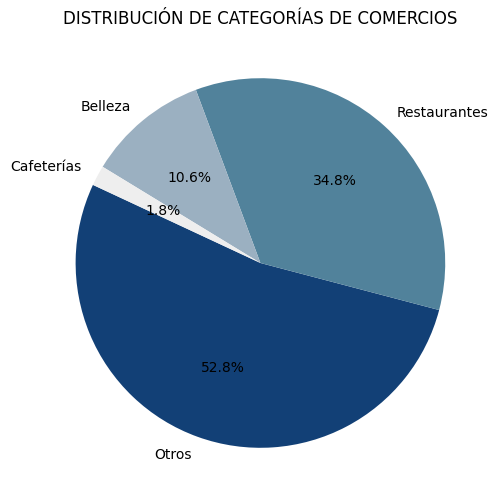

In [35]:
plt.figure(figsize=(6, 6))

plt.pie(df_agrupado['count'], labels=df_agrupado.index, autopct='%1.1f%%', startangle=155, colors=['#124076', '#51829B', '#9BB0C1', '#EEEEEE'])

plt.title('DISTRIBUCIÓN DE CATEGORÍAS DE COMERCIOS')

plt.show()

> *Si nos hubiéramos guiado únicamente por el conteo de ocurrencias de las categorías, habría sido bastante confuso posicionar las categorías de los comercios. Sin embargo, al agruparlas, podemos ver que la categoría más predominante es "restaurant". Esto sugiere que la mayoría de los comercios en el conjunto de datos están relacionados con la industria de restaurantes, lo que puede ser un indicador importante para comprender la distribución y la naturaleza de los negocios en la muestra.*

*Cantidad de comercios por calificación:*

*Almacenamos en una variable, los comercios agrupados según calificación:*

In [36]:
star = df_business['stars'].value_counts().sort_index()

*Graficamos:*

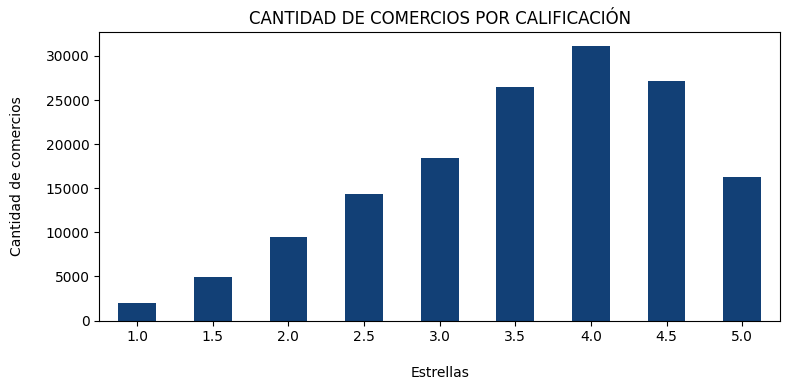

In [37]:
plt.figure(figsize=(8, 4))

star.plot(kind='bar', color='#124076')

plt.title('CANTIDAD DE COMERCIOS POR CALIFICACIÓN')

plt.xlabel('\nEstrellas')
plt.ylabel('Cantidad de comercios\n')

plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

> *La distribución de calificaciones de estrellas entre los comercios muestra que la mayoría de los negocios tienen calificaciones altas, con una cantidad significativa de negocios calificados con 4.0 y 4.5 estrellas. Esto sugiere que los usuarios tienden a calificar positivamente la mayoría de los comercios. Sin embargo, también hay una proporción menor de negocios con calificaciones más bajas, lo que indica que existen experiencias variadas entre los usuarios.*

*Comercios con mayor cantidad de reseñas:*

In [38]:
df_business.groupby('name')['review_count'].sum().sort_values(ascending=False).head()

name
Starbucks                 20692
McDonald's                17359
Dunkin'                    9864
Chipotle Mexican Grill     9383
First Watch                8921
Name: review_count, dtype: int64

> *Los comercios **Starbucks** y **McDonald's**, son los comercios con mayor cantidad de reseñas. Si bien esto podria asociarse a su popularidad y visibilidad en el mercado, también podria estar relacionado a la cantidad de sucursales que cada uno de ellos poseen.*

***Filtramos el DataFrame, quedandonos con los registros relacionados al comercio de nuestro interes, McDonald's:***

In [39]:
df_business_mc = df_business[df_business['name'].str.contains("McDonald's")]

In [40]:
df_business_mc['categories'].value_counts()

categories
Fast Food, Coffee & Tea, Burgers, Restaurants, Food                            16
Fast Food, Burgers, Coffee & Tea, Restaurants, Food                            12
Fast Food, Restaurants, Burgers, Coffee & Tea, Food                            12
Burgers, Restaurants, Coffee & Tea, Food, Fast Food                            12
Restaurants, Burgers, Fast Food, Food, Coffee & Tea                            11
                                                                               ..
Hot Dogs, Burgers, Food, Coffee & Tea, Fast Food, Restaurants                   1
Food, American (Traditional), Restaurants, Fast Food, Coffee & Tea, Burgers     1
Restaurants, Burgers, Food, Coffee & Tea, Hot Dogs, Fast Food                   1
Restaurants, Fast Food, Breakfast & Brunch, Burgers, Coffee & Tea, Food         1
Coffee & Tea, Food, Burgers, Fast Food, Restaurants, Sandwiches                 1
Name: count, Length: 167, dtype: int64

> *Podemos ver que el mismo comercio, tiene 167 categorias distintas. Si bien todas hacen referencia al mismo tipo de comercio, figuran escritas de distintas formas, con distintas palabras claves o en distinto orden; algo que deberiamos estandarizar en un futuro.*

In [41]:
df_business_mc['categories'].str.contains('Restaurants|Restaurant|restaurant|Fast Food|Food').sum()

703

> *Pudimos verificar que filtramos correctamente, corroborando que el comercio correspondiera a la categoria Restaurant, buscando palabras claves.*

*Guardamos el dataset filtrado para su posterior uso:*

In [42]:
df_business_mc.to_parquet('./Datos/Archivos Filtrados/business_mcdonalds.parquet')

***Análisis exhaustivo del DataFrame filtrado (McDonald's):***

*Resumen estadistico del DataFrame filtrado, tanto de variables numericas, como categoricas:*


In [43]:
df_business_mc.describe(include='all')

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
count,703,703,703,703,703,703,703.000000,703.000000,703.000000,703.000000,703.000000,702,703,676
unique,703,1,702,263,14,475,NaN,NaN,NaN,NaN,NaN,668,167,159
top,yM8LlTInbQH4FwWC97lz6w,McDonald's,501 Westbank Expy,Indianapolis,PA,89502,NaN,NaN,NaN,NaN,NaN,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Fast Food, Coffee & Tea, Burgers, Restaurants,...","{'Friday': '0:0-0:0', 'Monday': '0:0-0:0', 'Sa..."
freq,1,703,2,48,170,7,NaN,NaN,NaN,NaN,NaN,7,16,258
mean,NaN,NaN,NaN,NaN,NaN,NaN,37.107962,-88.536985,1.863442,24.692745,0.931721,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6.195158,13.469802,0.522146,18.637708,0.252403,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,27.712884,-119.882540,1.000000,5.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,32.189378,-90.289183,1.500000,13.000000,1.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,38.812550,-86.140767,2.000000,20.000000,1.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,39.954566,-75.600576,2.000000,31.000000,1.000000,NaN,NaN,NaN


> *A partir de este resumen estadistico podemos concluir que hay un total de 703 sucursales de McDonald's, y todas poseen un ID unico.*

> *La calificación promedio (stars) de las sucursales es de aproximadamente 1.86, lo que sugiere que la mayoría de las sucursales tienen una baja calificación promedio. La cantidad promedio de reseñas por sucursal es de aproximadamente 24.69, el 93.17% de las sucursales están abiertas, lo que indica que la mayoría de las sucursales en el conjunto de datos están en funcionamiento.*

> *La mayoría de las sucursales están ubicadas en el estado de PA (Pennsylvania) y la mayor parte de las sucursales tienen códigos postales únicos, lo que sugiere que están distribuidas en diferentes ubicaciones.*

*Anteriomente, habiamos visto que el DataFrame con los registros de todos los comercios, no tenian valores nulos, o tenian muy pocos. Pero revisamos nuestro DataFrame filtrado, para ver si esos valores faltantes corresponden a los registros de las sucursales de McDonald's:*

In [44]:
ut.porcentaje_valores_nulos(df_business_mc)

La columna business_id tiene un  0.00 % de valores nulos
La columna name tiene un  0.00 % de valores nulos
La columna address tiene un  0.00 % de valores nulos
La columna city tiene un  0.00 % de valores nulos
La columna state tiene un  0.00 % de valores nulos
La columna postal_code tiene un  0.00 % de valores nulos
La columna latitude tiene un  0.00 % de valores nulos
La columna longitude tiene un  0.00 % de valores nulos
La columna stars tiene un  0.00 % de valores nulos
La columna review_count tiene un  0.00 % de valores nulos
La columna is_open tiene un  0.00 % de valores nulos
La columna attributes tiene un  0.14 % de valores nulos
La columna categories tiene un  0.00 % de valores nulos
La columna hours tiene un  3.84 % de valores nulos


> *La mayor parte de las columnas, no poseen valores nulos. Las columnas que si poseen valores nulos, no representan un problema debido al bajo porcentaje.*

*Calificación promedio de McDonald's por estado:*

In [45]:
df_business_mc.groupby('state')['stars'].mean().sort_values(ascending=False)

state
CA    1.979167
NJ    1.930000
IN    1.906250
IL    1.900000
NV    1.900000
PA    1.900000
FL    1.875000
AB    1.833333
AZ    1.829787
TN    1.818966
MO    1.801887
LA    1.779070
ID    1.657895
DE    1.562500
Name: stars, dtype: float64

> *Se observa que la calificación promedio se sitúa en torno a las 1.5 y 2.0 estrellas en todos los estados analizados. Esto sugiere que, independientemente del estado, los negocios tienden a recibir calificaciones relativamente bajas en general. Es necesario indagar más acerca de las razones detras de estas calificaciones.*

*Ciudades con mayor calificación promedio:*

In [46]:
df_business_mc.groupby('city')['stars'].mean().sort_values(ascending=False).head()

city
Marlton     3.75
Malaga      3.50
Olivette    3.00
Jamison     3.00
Bensalem    3.00
Name: stars, dtype: float64

> *Al analizar las calificaciones por ciudad, observamos que Marlton lidera con una calificación de 3.75, seguida de cerca por Malaga con 3.50. Por otro lado, varias ciudades como Olivette, Jamison y Bensalem tienen una calificación promedio de 3.00. Estos datos sugieren que Marlton y Malaga pueden tener un mayor nivel de satisfacción entre los clientes en comparación con otras ciudades. Se las podria tomar como referencia para elevar el promedio de calificaciones en el resto de las ciudades.*

*Sucursales de McDonald's con mejor calificación:*

*Obtenemos las cinco sucursales con mejor calificación:*

In [47]:
sucursales = df_business_mc.nlargest(5, 'stars')

*Verificamos en que ciudad y en que estado se encuentran esas sucursales con mejor calificación:*

In [48]:
for index, row in sucursales.iterrows():
    print(f"Sucursal ID: {row['business_id']}, Calificación: {row['stars']}, Ciudad: {row['city']}, Estado: {row['state']}")

Sucursal ID: BcyHAag7lr2bVZGNW4u1dA, Calificación: 4.0, Ciudad: Marlton, Estado: NJ
Sucursal ID: ayqh0cxxuLrnY55oZr0kkA, Calificación: 4.0, Ciudad: Edmonton, Estado: PA
Sucursal ID: NGK31ST2C3sT1uwNtAeFdw, Calificación: 4.0, Ciudad: Bensalem, Estado: IL
Sucursal ID: PN63nkTW7UBPeVTMZZ8blg, Calificación: 3.5, Ciudad: Malaga, Estado: NJ
Sucursal ID: jSAOaEVCfZkcDpg-yVJ_Ow, Calificación: 3.5, Ciudad: Exton, Estado: MO


> *Después de revisar las cinco sucursales de McDonald's con las mejores calificaciones, podemos observar que estas sucursales tienen calificaciones que van desde 3.5 hasta 4.0 estrellas. Esto sugiere que estas sucursales específicas están proporcionando un servicio y experiencia satisfactorios para sus clientes, lo que puede ser indicativo de una gestión efectiva y una atención al cliente de alta calidad en esas ubicaciones. Sin embargo, sería útil realizar un análisis más detallado para comprender mejor los factores que contribuyen a estas calificaciones superiores y cómo pueden replicarse en otras sucursales.*

*Cantidad de sucursales de McDonald's por calificación:*

*Analizamos la cantidad de sucursales de McDonald's según calificación:*

In [49]:
df_business_mc['stars'].value_counts().sort_values(ascending= False)

stars
1.5    288
2.0    230
2.5     97
1.0     48
3.0     28
3.5      9
4.0      3
Name: count, dtype: int64

> *Podemos ver que la mayor parte de las sucursales de McDonald's, tienen una calificación en el rango de 1.5 y 2.5 estrellas. Esta distribución sugiere que la mayoría de las sucursales han recibido calificaciones bajas, lo que puede indicar problemas de calidad o insatisfacción entre los clientes. Sería interesante profundizar en las razones detrás de estas calificaciones y buscar áreas de mejora para las sucursales.*

*Reseñas vs Calificación de McDonald's:*

*Graficamos la relación entre la cantidad de reseñas y las calificaciónes de las sucursales:*

In [50]:
df_business_mc.groupby('stars')['review_count'].sum()

stars
1.0    1214
1.5    8417
2.0    5370
2.5    1785
3.0     439
3.5     108
4.0      26
Name: review_count, dtype: int64

*Graficamos:*

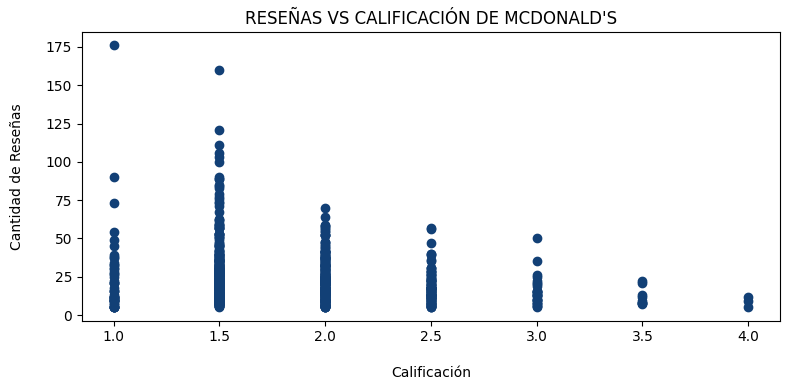

In [47]:
plt.figure(figsize=(8, 4))

plt.scatter(x=df_business_mc['stars'], y=df_business_mc['review_count'], color='#124076')

plt.title('RELACIÓN ENTRE RESEÑAS Y CALIFICACIÓN')

plt.xlabel('\nCalificación')
plt.ylabel('Cantidad de Reseñas\n')

plt.xticks(rotation=0)

plt.tight_layout()

plt.show()

> *Observamos que, en general, las sucursales con calificaciones más bajas tienden a tener mayor cantidad de reseñas, lo que sugiere una mayor participación de clientes disconformes o insatisfechos, en comparación con los clientes satisfechos con el servicio, la atención, etc.*

*Porcentaje de sucursales abiertas vs cerradas:*

*Obtenemos la cantidad de sucursales abiertas vs. sucursales cerradas:*

In [48]:
is_open = df_business_mc['is_open'].value_counts()

*Graficamos:*

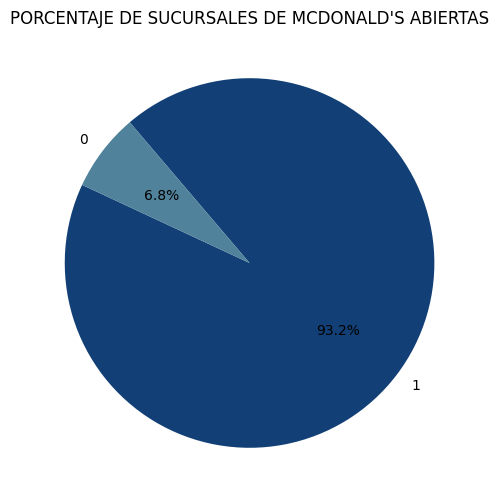

In [49]:
plt.figure(figsize=(6, 6))

plt.pie(is_open.values, labels=is_open.index, autopct='%1.1f%%', startangle=155, colors=['#124076', '#51829B'])

plt.title('PORCENTAJE DE SUCURSALES DE MCDONALD\'S ABIERTAS')

plt.show()

`Referencias:`
- 0: Cerrado
- 1: Abierto


> *Se observa que aproximadamente el 93.2% de las sucursales están abiertas, lo que indica que la gran mayoría de las sucursales se encuentran operando. Esto sugiere una presencia estable y continua de la cadena en el mercado, con un bajo porcentaje de sucursales cerradas en comparación.*

### Tip 📊

*Dataset que contiene información acerca de Tips (consejos) escritos por el usuario. Los tips son más cortas que las reseñas y tienden a dar sugerencias rápidas.*

*Definimos la ruta del archivo :*

In [53]:
ruta = './Datos/Yelp/tip.json' 

*Almacenamos el contenido del archivo en un DataFrame:*

In [54]:
df_tip = pd.read_json(ruta, lines=True)

*Visualizamos la estructura del DataFrame:*

In [55]:
df_tip.head(2)

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0


*Guardamos el archivo en formato **.parquet**:*

In [56]:
df_tip.to_parquet('./Datos/Yelp/tip.parquet')

*Y lo volvemos a abrir, pero en formato **.parquet**:*

In [57]:
df_tip = pd.read_parquet('./Datos/Yelp/tip.parquet')

*Visualizamos la información general del DataFrame, para ver el nombre de las columnas, la cantidad de valores **non-null** y los tipos de datos de los elementos de cada columna:*

In [58]:
df_tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908915 entries, 0 to 908914
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           908915 non-null  object        
 1   business_id       908915 non-null  object        
 2   text              908915 non-null  object        
 3   date              908915 non-null  datetime64[ns]
 4   compliment_count  908915 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 34.7+ MB


*Verificamos el porcentaje de valores nulos:*

In [62]:
ut.porcentaje_valores_nulos(df_tip)

La columna user_id tiene un  0.00 % de valores nulos
La columna business_id tiene un  0.00 % de valores nulos
La columna text tiene un  0.00 % de valores nulos
La columna date tiene un  0.00 % de valores nulos
La columna compliment_count tiene un  0.00 % de valores nulos


> *Podemos ver que ninguna columna posee valores nulos.*

*Analizamos las estadisticas descriptivas de todo el DataFrame, tanto variables numericas como variables categoricas, y veremos que información relevante podemos obtener a partir de allí:*

In [67]:
df_tip.describe(include='all')

,user_id,business_id,text,date,compliment_count
count,908848,908848,908848,908848,908848.000000
unique,301758,106193,851033,NaN,NaN
top,fCvMnJU1Z-XhAjKg99wK3Q,FEXhWNCMkv22qG04E83Qjg,Great food,NaN,NaN
freq,4071,2571,597,NaN,NaN
mean,NaN,NaN,NaN,2015-06-14 10:29:31.463819520,0.012526
min,NaN,NaN,NaN,2009-04-16 13:11:49,0.000000
25%,NaN,NaN,NaN,2013-01-26 01:28:06.750000128,0.000000
50%,NaN,NaN,NaN,2015-03-15 01:22:40,0.000000
75%,NaN,NaN,NaN,2017-08-02 05:30:16,0.000000
max,NaN,NaN,NaN,2022-01-19 20:38:55,6.000000


> *A partir de este resumen estadistico podemos concluir que la frase en los tips más frecuente es "Great food", lo que sugiere que los usuarios valoran la calidad de la comida.*

> *Se puede identificar que el usuario más activo en la plataforma es aquel con ID fCvMnJU1Z-XhAjKg99wK3Q, realizando multiples reseñas a lo largo del tiempo. Es importante tener en cuenta la influencia de este usuario en la percepción general de los negocios debido a su actividad destacada en la plataforma.*

> *Podemos identificar el ID del comercio que mayor cantidad de tips recibio a traves de esta plataforma, es aquel de ID FEXhWNCMkv22qG04E83Qjg, con un total de 2571 tips.*

> *El dataset contiene información de las reseñas del periodo comprendido entre el 16 de abril de 2009 y el 19 de enero de 2022.*

*Analizamos los registros duplicados:*

In [63]:
ut.registros_duplicados(df_tip)

,user_id,business_id,text,date,compliment_count
1644,SNZJNz1WEIMECEk-TAYADQ,6Gx45ltNNZvjzVBO6ZgVOg,"Great food, fun place!",2017-10-10 20:13:08,0
11367,00Cz_vdInMHpTRjqbWjK5Q,ncacMQ9n_dSM1cR3c1vTQw,Miss saigon,2010-12-07 01:59:12,0
21583,Tf63LdfubjlFm974OrdTXg,CyiN_owscPJNvlwul0XJPg,LM,2011-11-22 12:48:02,0
29901,00Cz_vdInMHpTRjqbWjK5Q,ncacMQ9n_dSM1cR3c1vTQw,Miss saigon,2010-12-07 01:59:12,0
32192,y_PMpgAxTWUIYAmzfFc6VA,Bw0cpnfI-Y9QmjWzqS-oFg,Late dinner w @steinerrecliner,2011-01-31 01:07:40,0
...,...,...,...,...,...
820290,wYo3aBVj-bRPT7E4RSj5Kg,W5SNps2JaT_RozLAl_TN1Q,Worker there are the best at serving me quick ...,2017-12-17 01:10:52,0
869840,TEjijSowDwJM4vCL-zn4ew,YPHDzg1h-PkaxfoppT-iJg,bleed blue,2011-09-26 00:03:49,0
873070,TEjijSowDwJM4vCL-zn4ew,YPHDzg1h-PkaxfoppT-iJg,bleed blue,2011-09-26 00:03:49,0
900543,XJcb75c9OY0xX8spM0TQuw,UlGS2NxZSiph33E3nfovRw,Whiskey Kitchen is the perfect place for bar f...,2013-08-04 16:43:08,0


> *Tenemos 126 registros duplicados. Eliminaremos los duplicados, manteniendo la primer aparición:*

In [64]:
df_tip.drop_duplicates(keep= 'first', inplace= True)

*Verificamos:*

In [65]:
ut.registros_duplicados(df_tip)

,user_id,business_id,text,date,compliment_count


*Palabras más frecuentes en los tips:*

*Extraemos el texto de las reseñas:*

In [ ]:
text = " ".join(review for review in df_tip['text'])

*Generamos la nube de palabras:*

In [63]:
wc = WordCloud(background_color="white", max_words=100, width=800, height=400, colormap='Blues')
wc.generate(text)

*Graficamos:*

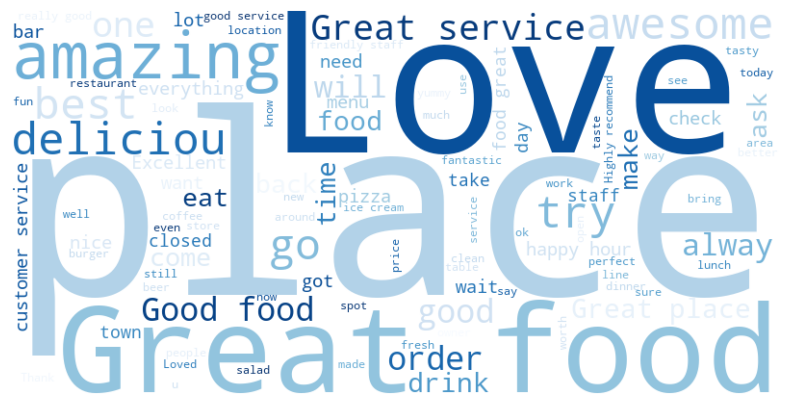

In [64]:
plt.figure(figsize=(10, 5))

plt.imshow(wc, interpolation='bilinear')

plt.axis('off')

plt.show()

> *Podemos observar que las palabras más repetidas en las reseñas son principalmente positivas o neutrales. Esto sugiere que los clientes que dejan reseñas tienden a tener una experiencia generalmente favorable o al menos no negativa en estos comercios.*

*Tendencia de interacción por año:*

*Creamos un DataFrame auxiliar, donde obtendremos solamente el año de la columna "date", y agruparemos la cantidad de tips por año:*

In [65]:
df_agrupado_año = pd.DataFrame(df_tip['date'].apply(lambda x: x.strftime('%Y')).value_counts().sort_index())

*Graficamos:*

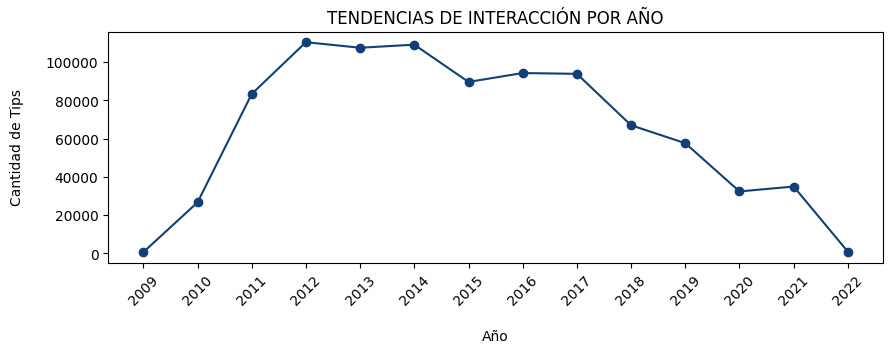

In [69]:
plt.figure(figsize=(10, 3))

plt.plot(df_agrupado_año.index, df_agrupado_año.values, color='#124076', marker= 'o')

plt.title('TENDENCIAS DE INTERACCIÓN POR AÑO')

plt.xlabel('\nAño')
plt.ylabel('Cantidad de Tips\n')

plt.xticks(rotation=45)

plt.show()

> *Obseravamos que hubo un aumento en la interacción de los usuarios entre 2009 y 2012, seguido de un período de relativa estabilidad entre 2012 y 2014, con un alto número de reseñas realizadas. Sin embargo, desde 2014 en adelante, la interacción de los usuarios en la plataforma ha estado disminuyendo. Este patrón podría indicar cambios en el comportamiento de los usuarios o en la popularidad de la plataforma a lo largo del tiempo.*

*Analizamos los tips realizados hacia el comercio de nuestro interes, McDonald's:*

In [70]:
mcdonalds = df_tip[df_tip['business_id'].isin(df_business_mc['business_id'])]

*Sucursales de McDonald's con mayor cantidad de tips:*

*Averiguamos cuales son las 5 sucursales con mayor cantidad de tips recibidos:*

In [73]:
sucursales = mcdonalds['business_id'].value_counts().head()

sucursales

business_id
hVRebPv7EKMUGVV2m5IKaQ    97
TC0SkzAqSdbmX0bYyvoJ8g    45
3w7NRntdQ9h0KwDsksIt5Q    25
RL6BaK196Scg2DEY3Uc1AQ    25
3UHXD8T80OUFMCzLb3x-sQ    20
Name: count, dtype: int64

*Averiguamos en que ciudad y estado, se encuentran esas sucursales con mayor cantidad de tips:*

In [74]:
for index, row in df_business.iterrows():
    if row['business_id'] in sucursales.index:
        print(f"Sucursal ID: {row['business_id']}, Nombre: {row['name']}, Ciudad: {row['city']}, Estado: {row['state']}, Calificación: {row['stars']}")

Sucursal ID: 3w7NRntdQ9h0KwDsksIt5Q, Nombre: McDonald's, Ciudad: Tucson, Estado: PA, Calificación: 2.0
Sucursal ID: TC0SkzAqSdbmX0bYyvoJ8g, Nombre: McDonald's, Ciudad: Philadelphia, Estado: IN, Calificación: 1.5
Sucursal ID: hVRebPv7EKMUGVV2m5IKaQ, Nombre: McDonald's, Ciudad: Philadelphia, Estado: NV, Calificación: 1.5
Sucursal ID: 3UHXD8T80OUFMCzLb3x-sQ, Nombre: McDonald's, Ciudad: New Orleans, Estado: MO, Calificación: 1.0
Sucursal ID: RL6BaK196Scg2DEY3Uc1AQ, Nombre: McDonald's, Ciudad: Indianapolis, Estado: FL, Calificación: 1.5


> *Podemos concluir que las sucursales con mayor cantidad de reseñas, tienden a tener calificaciones en su mayoría bajas. Esto sugiere que, a pesar de las críticas negativas, estas sucursales siguen generando un alto nivel de interacción por parte de los usuarios. Sería interesante profundizar en las razones detrás de estas críticas y la persistente interacción de los usuarios con estas sucursales.*

*Tendencia de interacción por año hacia sucursales de McDonald's:*

*Creamos un DataFrame auxiliar, donde obtendremos solamente el año de la columna "date", y agruparemos la cantidad de reseñas por año hacia nuestras sucursales de McDonald's:*

In [75]:
df_agrupado_año = pd.DataFrame(mcdonalds['date'].apply(lambda x: x.strftime('%Y')).value_counts().sort_index())

*Graficamos:*

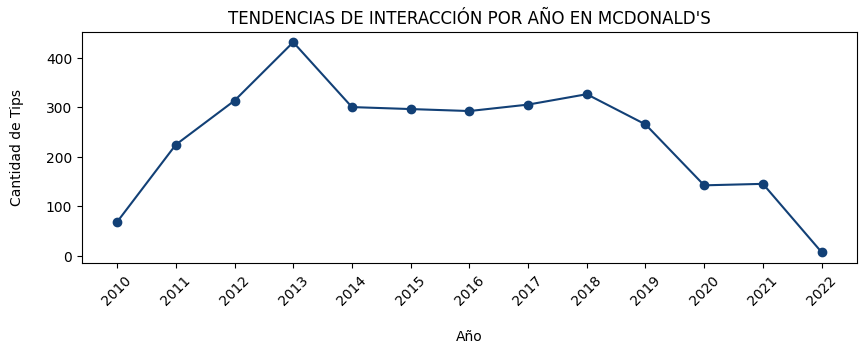

In [77]:
plt.figure(figsize=(10, 3))

plt.plot(df_agrupado_año.index, df_agrupado_año.values, color='#124076', marker= 'o')

plt.title('TENDENCIAS DE INTERACCIÓN POR AÑO EN MCDONALD\'S')

plt.xlabel('\nAño')
plt.ylabel('Cantidad de Tips\n')

plt.xticks(rotation=45)

plt.show()

> *Después de analizar las interacciones a lo largo de los años hacia las sucursales de McDonald's, se puede concluir que la tendencia de interacción sigue un patrón similar al observado en las interacciones hacia todos los comercios en la plataforma. Esto sugiere que la popularidad de la plataforma en sí misma puede ser un factor determinante en la cantidad de interacciones registradas, más que la popularidad específica de un negocio en particular.*

### Review 📊

*Definimos la ruta del archivo :*

In [83]:
ruta = './Datos/Yelp/review.json' 

*Creamos un función que lea el archivo en formato **.json** en fragmentos de 10000 y lo almacene en una lista vacia. Concatenamos los frangmentos de DataFrame en uno solo y guardamos el archivo en formato **.parquet** para que su peso sea menor:*

In [76]:
# Lista vacia para almacenar los fragmentos del DataFrame
dataframes = []

# Tamaño de los fragmentos
tamano_fragmento = 10000

# Leemos el archivo en fragmentos y creamos DataFrames
with open(ruta, 'r') as file:
    for chunk in pd.read_json(file, lines=True, chunksize=tamano_fragmento):
        dataframes.append(chunk)

# Concatenamos los DataFrames en uno solo
df_final = pd.concat(dataframes, ignore_index=True)

# Guardamos el DataFrame en formato Parquet para que su peso sea menor
df_final.to_parquet('review_temporal.parquet')


*Almacenamos el contenido del archivo en un DataFrame:*

In [68]:
df_reviews = pd.read_parquet('review_temporal.parquet')

*Visualizamos la estructura del DataFrame:*

In [69]:
df_reviews.head(2)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18


*Visualizamos la información general del DataFrame (columnas y tipos de datos):*

In [71]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 7 columns):
 #   Column       Dtype         
---  ------       -----         
 0   review_id    object        
 1   user_id      object        
 2   business_id  object        
 3   stars        int64         
 4   useful       int64         
 5   text         object        
 6   date         datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 373.3+ MB


*Eliminamos aquellas columnas que no seran revelevantes durante nuestro análisis:*

In [70]:
df_reviews = df_reviews.drop(columns= ['funny', 'cool'])

*Analizamos el porcentaje de valores nulos por columna:*

In [72]:
ut.porcentaje_valores_nulos(df_reviews)

La columna review_id tiene un  0.00 % de valores nulos
La columna user_id tiene un  0.00 % de valores nulos
La columna business_id tiene un  0.00 % de valores nulos
La columna stars tiene un  0.00 % de valores nulos
La columna useful tiene un  0.00 % de valores nulos
La columna text tiene un  0.00 % de valores nulos
La columna date tiene un  0.00 % de valores nulos


> *Ninguna columna posee valores nulos.*

In [76]:
ut.registros_duplicados(df_reviews)

,review_id,user_id,business_id,stars,useful,text,date


> *El dataset no posee registros duplicados.*

*Analizamos las estadisticas descriptivas de variables numéricas del DataFrame:*

In [73]:
df_reviews.describe()

,stars,useful,date
count,6.990280e+06,6.990280e+06,6990280
mean,3.748584e+00,1.184609e+00,2017-01-11 11:22:33.441780992
min,1.000000e+00,-1.000000e+00,2005-02-16 03:23:22
25%,3.000000e+00,0.000000e+00,2015-01-25 04:53:50.249999872
50%,4.000000e+00,0.000000e+00,2017-06-03 01:26:07
75%,5.000000e+00,1.000000e+00,2019-05-23 00:02:46.249999872
max,5.000000e+00,1.182000e+03,2022-01-19 19:48:45
std,1.478705e+00,3.253767e+00,NaN


> *Podemos concluir que el la calificación promedio es de 3.75, lo que sugiere que las reseñas tienden a ser positivas. La puntuación minima es 1 y la maxima es 5, lo que indica que el sistema de puntuación es coherente.*

> *El promedio de la columna "useful" es de 1.18, lo que sugiere que la mayoria de las reseñas no son marcadas como utiles y el minimo de esta columna es -1, lo que indica que podria haber un problema en los datos, ya que deberia ser igual o mayor a 0.*

> *Este dataset contiene información de las reseñas realizadas desde el 16 de febrero de 2005 hasta el 19 de enero de 2022, y la mayor parte de las reseñas fueron realizadas entre los años 2015 y 2019.*

*Y también, analizamos las estadisticas descriptivas de variables categoricas:*

In [74]:
reviews = df_reviews[df_reviews.select_dtypes(include= ['object']).columns]

In [77]:
reviews.describe()

,review_id,user_id,business_id,text
count,6990280,6990280,6990280,6990280
unique,6990280,1987929,150346,6974127
top,KU_O5udG6zpxOg-VcAEodg,_BcWyKQL16ndpBdggh2kNA,_ab50qdWOk0DdB6XOrBitw,DO NOT PARK HERE!\nthey are too quick to boot ...
freq,1,3048,7673,18


> *Podemos concluir que cada reseña tiene un ID unico, y que hay un total de 1.987.929 usuarios que realizaron reseñas en el periodo analizado. El usuario que más reseñas realizo es aquel de ID "_BcWyKQL16ndpBdggh2kNA" con un total de 3048 reseñas realizadas.*

> *Hay un total de 150.346 comercios analizados y el que más reseñas recibio fue aquel de ID "_ab50qdWOk0DdB6XOrBitw" con un total de 7.673 reseñas recibidas. Hay un total de 6.974.127 reseñas unicas, esto quiere decir que, no se suelen repetir las mismas reseñas.*

*Distribución de puntuación:*

In [78]:
puntuacion = df_reviews['stars'].value_counts().sort_index()

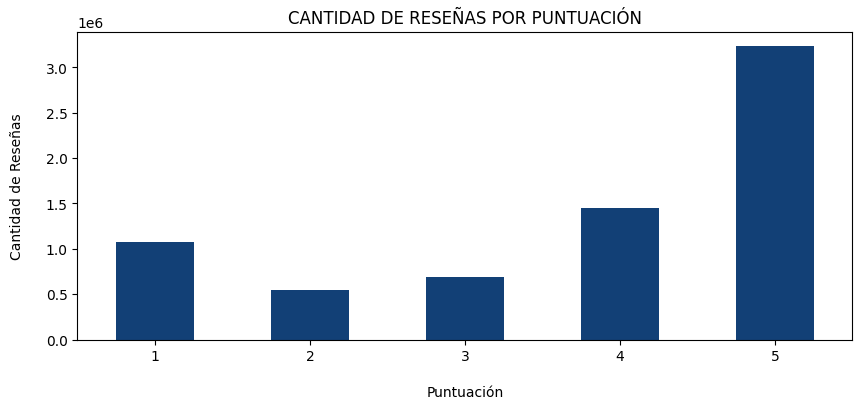

In [79]:
plt.figure(figsize= (10, 4))

puntuacion.plot(kind= 'bar', color= '#124076')

plt.title('CANTIDAD DE RESEÑAS POR PUNTUACIÓN')

plt.xlabel('\nPuntuación')
plt.ylabel('Cantidad de Reseñas\n')

plt.xticks(rotation= 0)

plt.show()

> *La puntución más frecuente es 5, con un total de 3.231.627 reseñas con esta puntuación, y la segunda más frecuente es 4, con 1.452.918 reseñas con esta puntuación. Esto indica que los usuarios tienden a tener una opinion positiva respecto a los negocios revisados. Sin embargo, también hay un número significativo de reseñas con puntuaciones bajas, lo que indica que también hay experiencias negativas que se comparten en las reseñas.*

*Comercios con mayor cantidad de reseñas:*

*Obtenemos las IDs de los comercios con mayor cantidad de reseñas recibidas:*

In [80]:
comercios = df_reviews['business_id'].value_counts().head()

*Averiguamos el nombre, la ciudad, estado y calificación de esos comercios:*

In [81]:
for index, row in df_business.iterrows():
    if row['business_id'] in comercios.index:
        print(f"Sucursal ID: {row['business_id']}, Nombre: {row['name']}, Ciudad: {row['city']}, Estado: {row['state']}, Calificación: {row['stars']}")

Sucursal ID: GXFMD0Z4jEVZBCsbPf4CTQ, Nombre: Hattie B’s Hot Chicken - Nashville, Ciudad: Nashville, Estado: NJ, Calificación: 4.5
Sucursal ID: ac1AeYqs8Z4_e2X5M3if2A, Nombre: Oceana Grill, Ciudad: New Orleans, Estado: FL, Calificación: 4.0
Sucursal ID: _ab50qdWOk0DdB6XOrBitw, Nombre: Acme Oyster House, Ciudad: New Orleans, Estado: AZ, Calificación: 4.0
Sucursal ID: ytynqOUb3hjKeJfRj5Tshw, Nombre: Reading Terminal Market, Ciudad: Philadelphia, Estado: PA, Calificación: 4.5
Sucursal ID: oBNrLz4EDhiscSlbOl8uAw, Nombre: Ruby Slipper - New Orleans, Ciudad: New Orleans, Estado: FL, Calificación: 4.5


> *Los comercios con mayor cantidad de reseñas estan poseen calificaciones superiores a 4.0; esto podria sugerir que en general, los usuarios estan más inclinados a dejar reseñas cuando tienen una experiencia positiva con un negocio, que cuando tienen una experiencia regular o negativa.*

*Relación entre calificación y comentarios útiles:*

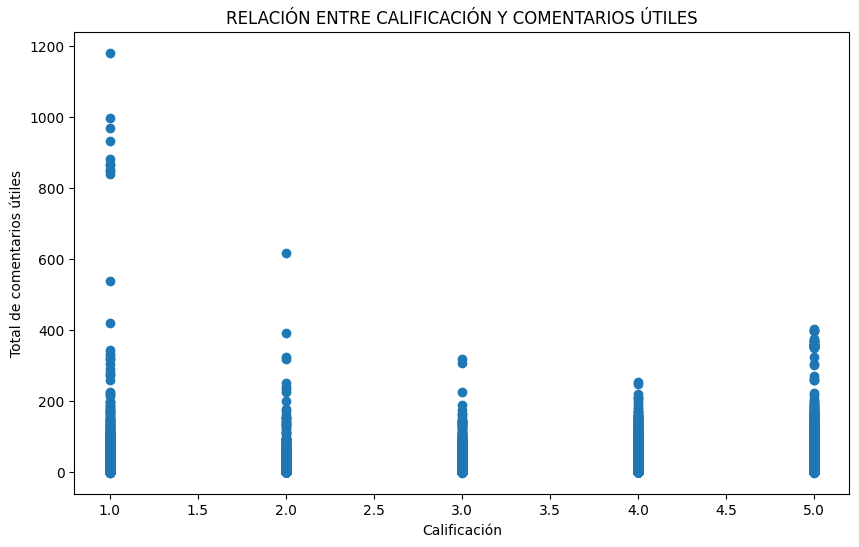

In [82]:
plt.figure(figsize=(10, 6))

plt.scatter(df_reviews['stars'], df_reviews['useful'])

plt.title('RELACIÓN ENTRE CALIFICACIÓN Y COMENTARIOS ÚTILES')

plt.xlabel('Calificación')
plt.ylabel('Total de comentarios útiles')

plt.show()


> *Basándonos en el gráfico de dispersión que muestra la relación entre las calificaciones (stars) y la cantidad de veces que los comentarios son marcados como útiles (useful), podemos observar que la mayoría de los comentarios con calificaciones altas también recibieron un gran número de marcaciones como útiles. Esto sugiere que los usuarios encuentran valiosos los comentarios positivos y los consideran útiles para tomar decisiones.*

*Analizamos las reseñas realizadas hacia las sucursales de McDonald's:*

In [141]:
reviews_mc = df_reviews[df_reviews['business_id'].isin(df_business_mc['business_id'])]

*Analizamos las estadisticas descriptivas de nuestro DataFrame, tanto en variables numéricas como categoricas:*

In [142]:
reviews_mc.describe(include= 'all')

,review_id,user_id,business_id,stars,useful,text,date
count,18210,18210,18210,18210.000000,18210.000000,18210,18210
unique,18210,15318,703,NaN,NaN,18175,NaN
top,12WmsX0EwwDlQyGXAgtkww,cFaHx-FkCnzdfF8BccukIg,3UHXD8T80OUFMCzLb3x-sQ,NaN,NaN,I am very furious with the customer service at...,NaN
freq,1,23,183,NaN,NaN,2,NaN
mean,NaN,NaN,NaN,1.783086,0.687644,NaN,2018-04-05 03:44:53.363646208
min,NaN,NaN,NaN,1.000000,0.000000,NaN,2006-07-19 01:28:35
25%,NaN,NaN,NaN,1.000000,0.000000,NaN,2016-10-05 19:30:40.249999872
50%,NaN,NaN,NaN,1.000000,0.000000,NaN,2018-09-13 20:09:51
75%,NaN,NaN,NaN,2.000000,1.000000,NaN,2020-01-14 06:43:36.249999872
max,NaN,NaN,NaN,5.000000,64.000000,NaN,2022-01-19 15:22:00


> *Se registraron un total de 18.210 reseñas hacia las 703 sucursales de McDonald's, realizadas por 15.318 usuarios diferentes.* 

> *La calificación promedio de las reseñas hacia las sucursales de McDonald's es de 1.78, lo que sugiere una tendencia hacia calificaciones bajas.*

> *La cantidad promedio de veces que las reseñas son marcadas como útiles es de alrededor de 0.69. La cantidad mínima de marcaciones útiles es 0, mientras que la máxima es 64. Esto sugiere que la utilidad de las reseñas varía considerablemente, con algunas reseñas siendo consideradas muy útiles por otros usuarios.*

> *La sucursal que mayor cantidad de reseñas recibio, fue aquella de ID 3UHXD8T80OUFMCzLb3x-sQ con un total de 183 reseñas recibidas.*

*Palabras más frecuentes en las reseñas:*

*Extraemos el texto de las reseñas:*

In [144]:
text = " ".join(review for review in reviews_mc['text'])

*Generamos la nube de palabras:*

In [145]:
wc = WordCloud(background_color="white", max_words=100, width=800, height=400, colormap='Blues')
wc.generate(text)

*Graficamos:*

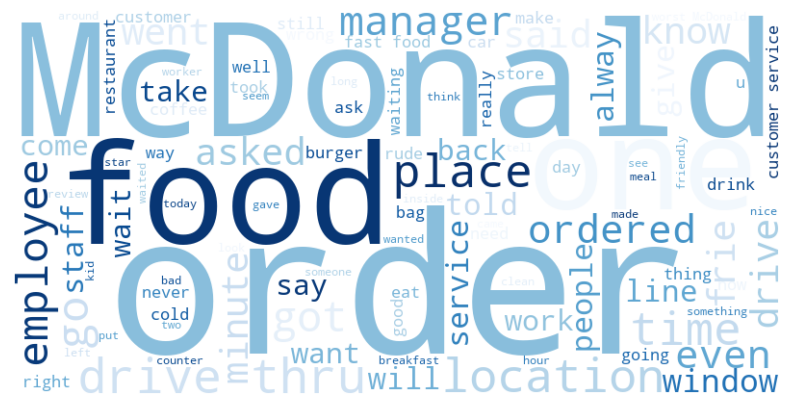

In [146]:
plt.figure(figsize=(10, 5))

plt.imshow(wc, interpolation='bilinear')

plt.axis('off')

plt.show()

> *Las palabras más frecuentes en las reseñas hacia las sucursales de McDonald's son "McDonald", "food", "place", "employee", "order", etc. Esto sugiere que los usuarios mencionan con frecuencia aspectos relacionados con la comida, el servicio y la gestión en sus comentarios sobre las sucursales del comercio de nuestro interes.*

### Metadatos Sitios 📊

*Definimos la ruta del archivo :*

In [2]:
ruta = './Datos/metadata-sitios'

*Leemos los archivos **.json** de la carpeta **metadata-sitios** filtrándolos por la columna 'name' en base a si corresponde o no con un local de McDonalds; esto lo hacemos tanto por el peso del dataset original cómo también de los propósitos que tenemos en base a la tarea encomendada. Convertimos el DataFrame en un archivo compatible con parquet, y lo guardamos de manera local para su posterior uso:*

In [3]:
#Generamos una lista vacia donde almacenaremos los DataFrames
dfs = []

#Iteramos sobre los archivos del directorio
for filename in os.listdir(ruta):

    #Si el archivo es un JSON, lo leemos y filtramos los registros que contengan la palabra McDonald's
    if filename.endswith('.json'):
        filepath = os.path.join(ruta, filename)
        df = pd.read_json(filepath, lines=True)
        df_filtered = df[df['name'].str.contains(r"\bMcDonald's\b|\bMc Donald's\b", case=False, na=False, regex=True)]
        dfs.append(df_filtered)

#Si se encontraron DataFrames, los concatenamos y guardamos el resultado en formato Parquet
if len(dfs) > 0:
    merged_df = pd.concat(dfs)
    merged_df.reset_index(drop=True, inplace=True)

    # Guardamos el DataFrame en formato Parquet
    merged_df.to_parquet('./Datos/metadatos-sitios.parquet')
    
else:
    print("No se encontraron archivos JSON en el directorio que cumplieran con la condición.")

*Leemos el archivo generado anteriormente y lo almacenamos en un DataFrame para proceder con las transformaciones del mismo:*

In [ ]:
df_sitios = pd.read_parquet('./Datos/metadatos-sitios.parquet')

*Visualizamos la información del DataFrame y su primer fila*

In [4]:
df_sitios.info()

df_sitios.sample(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1080 non-null   object 
 1   address           1080 non-null   object 
 2   gmap_id           1080 non-null   object 
 3   description       1010 non-null   object 
 4   latitude          1080 non-null   float64
 5   longitude         1080 non-null   float64
 6   category          1079 non-null   object 
 7   avg_rating        1080 non-null   float64
 8   num_of_reviews    1080 non-null   int64  
 9   price             990 non-null    object 
 10  hours             822 non-null    object 
 11  MISC              1070 non-null   object 
 12  state             825 non-null    object 
 13  relative_results  960 non-null    object 
 14  url               1080 non-null   object 
dtypes: float64(3), int64(1), object(11)
memory usage: 126.7+ KB


,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
499,McDonald's,"McDonald's, 11700 Morning Gate Ln, New Market,...",0x89c9d3bae2ff34f1:0x1d2ea3ad76aa8aeb,"Classic, long-running fast-food chain known fo...",39.384963,-77.256708,"[Fast food restaurant, Breakfast restaurant, C...",3.7,648,$,"[[Saturday, 5:30AM–12AM], [Sunday, 6AM–11PM], ...",{'Accessibility': ['Wheelchair-accessible entr...,Closed ⋅ Opens 5:30AM,"[0x89c9d3bc1f6dac3f:0x71d5cf65359b7279, 0x89c9...",https://www.google.com/maps/place//data=!4m2!3...


>*Podemos ver que los nombres de la mayoría de columnas están totalmente en minúsculas, la unica que se escapa a la regla es la columna 'MISC' que está totalmente en mayúsculas, lo que puede complicar su uso en futuros estadíos del proyecto. Poseemos el nombre ('name') y el Id de Google Maps (gmap_id) lo que no es conveniente para analizar este dataframe además de poseer las coordenadas por latitud y longitud por si queremos ubicar los locales en un mapa.*

> *En la columna 'name' podemos ver que no hay un nombre uniforme de estas cadena sino que varios nombres diferentes, debemos realizarle un proceso de estandarización a esto. Además, varios de los nombres de columnas son diferente a otros datasets con los que se pueden relacionar, por lo que debemos estandarizar estos nombres en los diversos datasets para poder trabajar de mejor manera.*

>*Hay que tener en cuenta que la columna 'state' no hace referencia al estado el cual pertenece el local, si no de si sigue abierto y una breve descripción de los horarios que tienen (una descripción más detallada se encuentra en la columna 'hours'). El nombre de esta columna puede llegar a confundir en momentos posteriores del trabajo, por lo que recomendamos renombrarla y, a la vez, agregar en este dataset información sobre el estado al cual pertenecen estos locales; esta información la podremos sacar de otros datasets.*

In [5]:
ut.porcentaje_valores_nulos(df_sitios)

La columna name tiene un  0.00 % de valores nulos
La columna address tiene un  0.00 % de valores nulos
La columna gmap_id tiene un  0.00 % de valores nulos
La columna description tiene un  6.48 % de valores nulos
La columna latitude tiene un  0.00 % de valores nulos
La columna longitude tiene un  0.00 % de valores nulos
La columna category tiene un  0.09 % de valores nulos
La columna avg_rating tiene un  0.00 % de valores nulos
La columna num_of_reviews tiene un  0.00 % de valores nulos
La columna price tiene un  8.33 % de valores nulos
La columna hours tiene un  23.89 % de valores nulos
La columna MISC tiene un  0.93 % de valores nulos
La columna state tiene un  23.61 % de valores nulos
La columna relative_results tiene un  11.11 % de valores nulos
La columna url tiene un  0.00 % de valores nulos


>*En cuanto a nulos poseemos varios en las siguientes columnas: description, price, hours, state y relative_results. Estas columnas pueden llegar a presentar gran cantidad de valores nulos, lo que puede complicar su uso posterior.*

In [6]:
df_sitios.describe(include='all')

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
count,1080,1080,1080,1010,1080.000000,1080.000000,1079,1080.000000,1080.000000,990,822,1070,825,960,1080
unique,55,1074,1075,3,NaN,NaN,1022,NaN,NaN,3,822,1008,83,960,1075
top,McDonald's,"McDonald's, 1205 S Main St, Manteca, CA 95336",0x80904101ce001281:0x76db23c5d22346ae,"Classic, long-running fast-food chain known fo...",NaN,NaN,[Fast food restaurant],NaN,NaN,$,"[[Wednesday, 5AM–11PM], [Thursday, 5AM–11PM], ...","{'Accessibility': None, 'Amenities': None, 'At...",Open 24 hours,"[0x8090410018dc2657:0xed7a807ae3eeee6d, 0x8090...",https://www.google.com/maps/place//data=!4m2!3...
freq,1020,2,2,984,NaN,NaN,32,NaN,NaN,664,1,38,253,1,2
mean,NaN,NaN,NaN,NaN,36.757965,-92.931886,NaN,3.339352,683.382407,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,5.596328,16.249212,NaN,0.548431,668.879633,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,19.503497,-158.034057,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,32.902407,-98.367220,NaN,3.100000,48.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,37.310051,-87.915605,NaN,3.400000,597.500000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,40.817841,-81.361396,NaN,3.600000,1138.000000,NaN,NaN,NaN,NaN,NaN,NaN


>*Podemos ver que contamos con 1080 registros, siendo la media de rating de los locales es de 3.33% y que la cateogría sea '[Fast food restaurant]' y en el estado figure 'Open 24 hours' lo que indica que brinda servicios 24hs al día*

>*Podemos ver que el máximo que un local obtuvo de reviews fueron 5132 mientras que el que menos obtuvo fue de 1 review. Esto nos va a ayudar a obtener a los locales más valorados en base a la opinión delos usuarios*

*Valores de la columna category*

In [7]:
df_sitios['category'].value_counts()

category
[Fast food restaurant]                                                                                                                    32
[Corporate office]                                                                                                                        11
[Restaurant]                                                                                                                              10
[Dessert shop]                                                                                                                             5
[Bus stop]                                                                                                                                 2
                                                                                                                                          ..
[Fast food restaurant, Breakfast restaurant, Coffee shop, Hamburger restaurant, Restaurant, Sandwich shop]                                 1
[Fas

> *Podemos ver que los distintos locales de esta cadena llegan a tener diferentes categorías. Si bien no podemos decir que algunas son erroneas, sí debemos modificar y estandarizar un tipo de categoría única.*

**Distribución de los locales por calificaciones**

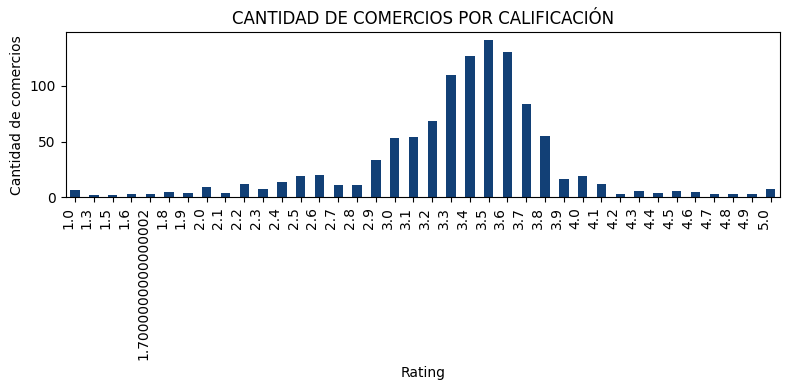

In [8]:
star = df_sitios['avg_rating'].value_counts().sort_index()

plt.figure(figsize=(8, 4))

star.plot(kind='bar', color='#124076')

plt.title('CANTIDAD DE COMERCIOS POR CALIFICACIÓN')

plt.xlabel('Rating')
plt.ylabel('Cantidad de comercios')

plt.xticks(rotation=90, ha='right')
plt.tight_layout()

plt.show()

> *Podemos ver que se crea una campana de Gauss al rededor del puntaje de 3.5, que marca la media de calificación de todos los locales.*

### review-Florida 📊

In [9]:
ruta = './Datos/review-Florida'

*Leemos los archivos **.json** de la carpeta **review-Florida**. Convertimos el DataFrame en un archivo compatible con parquet, y lo guardamos de manera local para su posterior uso:*

In [10]:
#Generamos una lista vacia donde almacenaremos los DataFrames
dfs = []

#Iteramos sobre los archivos del directorio
for filename in os.listdir(ruta):

    #Si el archivo es un JSON, lo leemos y lo almacenamos en la lista
    if filename.endswith('.json'):
        filepath = os.path.join(ruta, filename)
        df = pd.read_json(filepath, lines=True)
        dfs.append(df)

#Si se encontraron DataFrames, los concatenamos y guardamos el resultado en formato Parquet
if len(dfs) > 0:
    merged_df = pd.concat(dfs)
    merged_df.reset_index(drop=True, inplace=True)

    #Guardamos el DataFrame en formato Parquet
    merged_df.to_parquet('./Datos/review-Florida.parquet')
    
else:
    print("No se encontraron archivos JSON en el directorio que cumplieran con la condición.")

*Leemos el archivo generado anteriormente y lo almacenamos en un DataFrame para proceder con el análisis  del mismo:*

In [11]:
df_florida = pd.read_parquet('./Datos/review-Florida.parquet')

*Visualizamos la información del DataFrame y su primer fila*

In [12]:
df_florida.info()

df_florida.sample(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2850000 entries, 0 to 2849999
Data columns (total 8 columns):
 #   Column   Dtype  
---  ------   -----  
 0   user_id  float64
 1   name     object 
 2   time     int64  
 3   rating   int64  
 4   text     object 
 5   pics     object 
 6   resp     object 
 7   gmap_id  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 174.0+ MB


,user_id,name,time,rating,text,pics,resp,gmap_id
2015409,1.045868e+20,Daniel Jacob,1522440607609,4,Prompt service and good ole boy friendliness. ...,None,{'text': 'Thanks for coming in and shopping wi...,0x889388cc50c4743b:0xd80aef33770e2b75


> *Podemos ver que en este dataset no se tiene el nombre del negocio, complicando los procesos que luego requeriremos ya que deberemos cruzar la tabla con otras. Sin embargo, sí vemos que se tiene tanto el Id del usuario (User_Id) cómo el nombre del usuario (Name)*

In [13]:
ut.porcentaje_valores_nulos(df_florida)

La columna user_id tiene un  0.00 % de valores nulos
La columna name tiene un  0.00 % de valores nulos
La columna time tiene un  0.00 % de valores nulos
La columna rating tiene un  0.00 % de valores nulos
La columna text tiene un  37.88 % de valores nulos
La columna pics tiene un  96.34 % de valores nulos
La columna resp tiene un  84.02 % de valores nulos
La columna gmap_id tiene un  0.00 % de valores nulos


> *Las columnas con mayor cantidad de nulos son 'Text', 'Pics' y 'Resp'. Sin embargo, al ser interacciones de los usuarios que, al momento de que estos hagan una publicación, puedan quedar vacías, podemos tomar estos valores nulos cómo normales.*

In [14]:
df_florida.describe()

,user_id,time,rating
count,2.850000e+06,2.850000e+06,2.850000e+06
mean,1.093032e+20,1.555140e+12,4.313658e+00
std,5.276713e+18,4.360793e+10,1.170064e+00
min,1.000000e+20,1.041379e+12,1.000000e+00
25%,1.047751e+20,1.527462e+12,4.000000e+00
50%,1.092897e+20,1.557678e+12,5.000000e+00
75%,1.138648e+20,1.585605e+12,5.000000e+00
max,1.184467e+20,1.631205e+12,5.000000e+00


>*Basándonos en la descripción, la media de Rating de los locales es de 4.3*

*Conteo de ocurrencias en variables categoricas:*

In [17]:
df_florida['user_id'].value_counts().head()

user_id
1.115194e+20    209
1.158012e+20    177
1.125842e+20    172
1.181662e+20    132
1.134473e+20    122
Name: count, dtype: int64

In [18]:
df_florida['name'].value_counts().head()

name
A Google User    1335
Chris             401
David             360
Mike              354
John              351
Name: count, dtype: int64

>*Podemos ver que hay un tipo de usuario anónimo llamado 'A Google User' que contiene un gran número de reviews. Sin embargo, el número de interacciones no se corresponde con la descripción que hicimos sobre la columna 'User_Id', por lo que podemos encontrar el Id de cada usuario por más que lo hayan hecho anonimamente*

>*Dado que en este dataset sería normal el echo de que se repitan los valores en cualquier columna, no hay una forma certera de saber si hay duplcados o no.*

*Búsqueda de Outliers*

*Para esto voy a utilizar las columnas 'Gmap_Id' y 'User_Id'. En pos de un mejor rendimiento separé los datos en 3 grupos.*

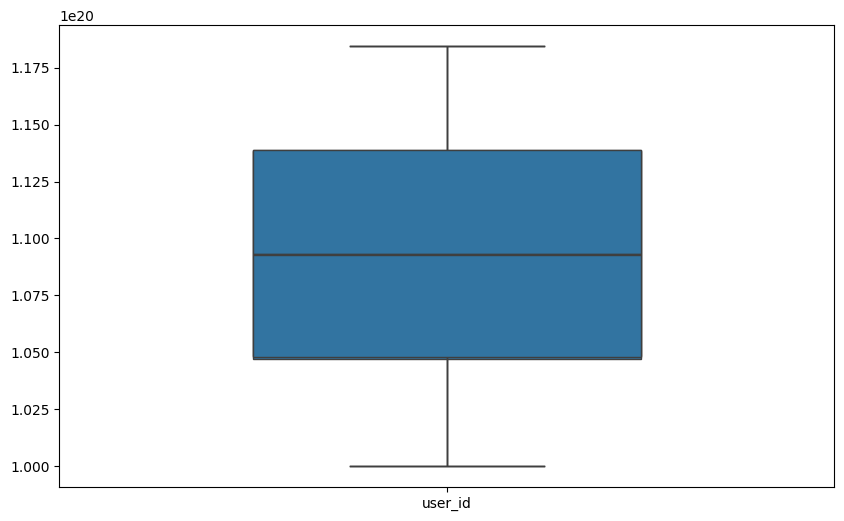

In [19]:
sample1 = df_florida[0:949998]
sample2 = df_florida[949999:1899998]
sample3 = df_florida[1899999:2849999]

plt.figure(figsize=(10, 6))

sns.boxplot(data=sample1[['gmap_id', 'user_id']], width=0.5)
sns.boxplot(data=sample2[['gmap_id', 'user_id']], width=0.5)
sns.boxplot(data=sample3[['gmap_id', 'user_id']], width=0.5)

plt.show()

>*Podemos ver que los datos que tenemos son bastante estables en donde apenas se aprecian diferencia en la media.*

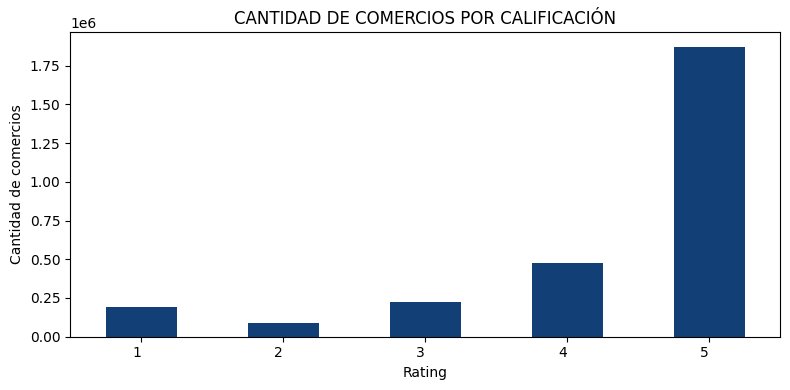

In [21]:
star = df_florida['rating'].value_counts().sort_index()

plt.figure(figsize=(8, 4))

star.plot(kind='bar', color='#124076')

plt.title('CANTIDAD DE COMERCIOS POR CALIFICACIÓN')

plt.xlabel('Rating')
plt.ylabel('Cantidad de comercios')

plt.xticks(rotation=0, ha='right')
plt.tight_layout()

plt.show()

>*Podemos ver que hay una amplia mayoría de locales puntuado con un rating de 5, de esto podríamos sacar que los usuarios tienden a puntuar las mejores experiancias. Sin embargo, el hecho que sea tal la diferencia nos lleva a considerar a estos datos cómo OUTLIERS*